<a href="https://colab.research.google.com/github/harisnaseer3/Linear-Regression-with-pytorch/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch numpy

Example:
in this senerio we will take an example of apple and orange crop yeild. we take four key fector(parameter) "region, temp, rainfall, humidity" of previous years and also we know the yield of apple and orange on that key fector. then we will predict the yield of next year. 

In [ ]:
import numpy as np
import torch

# Training data:
we can represent the trainig data using two matrices: "inputs" and "targets", each with one row per observation and one column per variable.
remember!  inputs is our parameter and targets is our outputs like "apple" and "orange".

In [ ]:
# input (temp, rainfal, humidity)
# we are declaring just numpy array, not creating tensor

inputs = np.array([[77, 65, 44],
                   [99, 66, 56],
                   [45, 73, 59],
                   [76, 102, 97],
                   [123, 97, 104]], dtype = 'float32')


In [ ]:
# targets (apple, orange)
# we are declaring just numpy array, not creating tensor

targets = np.array([[34, 77],
                    [78,45],
                    [78,100],
                    [78, 66],
                    [56, 97]], dtype = 'float32')

let's convert these numpy array to tensor

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 77.,  65.,  44.],
        [ 99.,  66.,  56.],
        [ 45.,  73.,  59.],
        [ 76., 102.,  97.],
        [123.,  97., 104.]])
tensor([[ 34.,  77.],
        [ 78.,  45.],
        [ 78., 100.],
        [ 78.,  66.],
        [ 56.,  97.]])


now we have to define model:  
in model there are two things we have to define "weights" and "baises".

In [ ]:
# weights and baises
# w11, w12, w13,
# w21, w22, w23
# b1, b2
# wieghts will be 2*3 becaus there are two targets variables apple and oranges. and 3 columns means inputs reservation temp, rainfall, humidity

w = torch.randn(2, 3, requires_grad= True) # randn picks the the random number
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

# after generating the random number. the numbers of first row will mul by temp, rainfall and humidity to make the yeild of apple.
# and 2nd row will mul by temp, rainfall and humidity to make the yeild of orange.
# then b1 nad b2

tensor([[ 1.7320, -0.5469, -0.2529],
        [ 0.0232,  0.5140,  0.7146]], requires_grad=True)
tensor([-1.5065,  1.5773], requires_grad=True)


our model simply a function that perform matrix mulptipulication.
like inputs x mul by weights w(transpors) plus baises.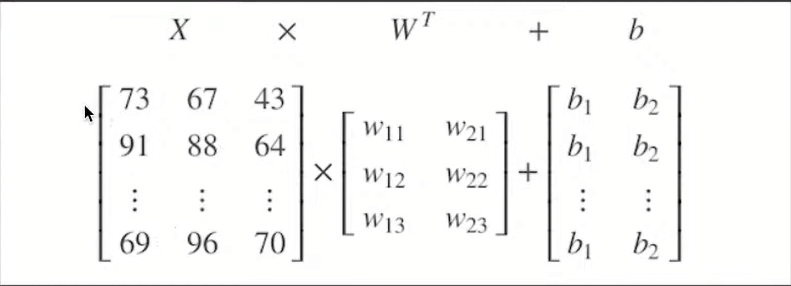

weight matrix

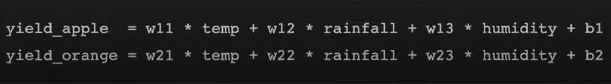

In [ ]:
inputs

tensor([[ 77.,  65.,  44.],
        [ 99.,  66.,  56.],
        [ 45.,  73.,  59.],
        [ 76., 102.,  97.],
        [123.,  97., 104.]])

In [ ]:
w.t() # that means transporse of waight matrix

tensor([[ 1.7320,  0.0232],
        [-0.5469,  0.5140],
        [-0.2529,  0.7146]], grad_fn=<TBackward>)

In [ ]:
inputs @ w.t() + b

tensor([[ 85.1817,  68.2134],
        [119.7042,  77.8120],
        [ 21.5896,  82.3033],
        [ 49.8119, 125.0821],
        [132.1801, 128.6025]], grad_fn=<AddBackward0>)

In [ ]:
# here we are doing same thing as above but in function
def model(x):
  return x @ w.t() + b   # @ means matrix multipulication then we add it to the bais

In [ ]:
# now generate prediction
preds = model(inputs)
print(preds)

tensor([[ 85.1817,  68.2134],
        [119.7042,  77.8120],
        [ 21.5896,  82.3033],
        [ 49.8119, 125.0821],
        [132.1801, 128.6025]], grad_fn=<AddBackward0>)


In [ ]:
# compare with targets
print(targets)

tensor([[ 34.,  77.],
        [ 78.,  45.],
        [ 78., 100.],
        [ 78.,  66.],
        [ 56.,  97.]])


As we can see the predictions and targets values is very different. they does not make any sense because we have initialize the baises and weights randomly.
so, to improve this issue we have to do 2 things:
1) we have to quantify/measure the value of predictions and targets values that how much diff has. we have to take diff of both matrices by elementwise and then take aquare of each element, it will make all differences positive then take avg.

after doing this we will have one number and that number we call mean square error (mse).

In [ ]:
diff = preds - targets

In [ ]:
diff * diff   # by doing this we will have all positive diffrences

tensor([[2619.5667,   77.2039],
        [1739.2404, 1076.6266],
        [3182.1377,  313.1721],
        [ 794.5665, 3490.6892],
        [5803.4004,  998.7205]], grad_fn=<MulBackward0>)

In [ ]:
torch.sum(diff*diff)

tensor(20095.3242, grad_fn=<SumBackward0>)

In [ ]:
diff.numel()    # numbers of element in diff

10

now we have to take average

In [ ]:
diff = preds - targets
torch.sum(diff*diff) / diff.numel()   # that is mean square error

tensor(2009.5325, grad_fn=<DivBackward0>)

now do all of above operation in function

In [ ]:
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff*diff) / diff.numel()

In [ ]:
#compute loss
loss = mse(preds, targets)
print(loss)

tensor(2009.5325, grad_fn=<DivBackward0>)


## **loss**
loss mean how much our model have error to predict and target variable

## Compute Gradient

with pytorch we can compute gradient automatically w.r.t weights and baises because we have set requires.grad = true. by using "backward" function.

In [ ]:
loss.backward()

In [ ]:
#compute gradient w.r.t weights
print(w)    #weights that we have already initialize randomly
print(w.grad)   #gradients w.r.t wieghts

tensor([[ 1.7320, -0.5469, -0.2529],
        [ 0.0232,  0.5140,  0.7146]], requires_grad=True)
tensor([[2551.8184, 1295.1218, 1289.5396],
        [2030.5638, 1878.8848, 1884.8765]])


In [ ]:
#compute gradient w.r.t baises
print(b)
print(b.grad)

tensor([-1.5065,  1.5773], requires_grad=True)
tensor([16.8935, 19.4027])


now, if we want to compute gradient w.r.t inputs than it will give error because we did not set requires.grad = true.

In [ ]:
print(inputs)
print(inputs.grad)

tensor([[ 77.,  65.,  44.],
        [ 99.,  66.,  56.],
        [ 45.,  73.,  59.],
        [ 76., 102.,  97.],
        [123.,  97., 104.]])
None


we have to keep taking G.D to change the weights then minimize the loss. remember loss is a quadratic function of weights and baises.

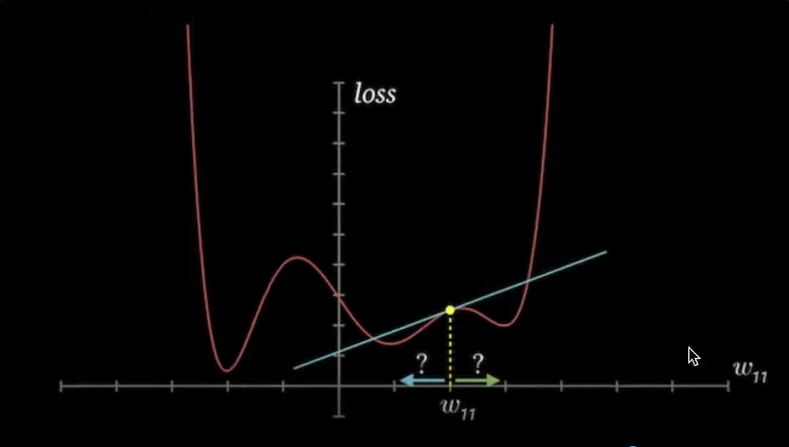

one thing to remember: if the gradient element of a specific weight e.g w11 is positive mean curve or slope(as in above image) is increasing and we do increase the weight then loss will also increase and if we decrease the weight then loss will decrease. but in case of gradient os positive.


if the gradient is negitive then we have increase the weight to minimize the loss. as shown in blow image

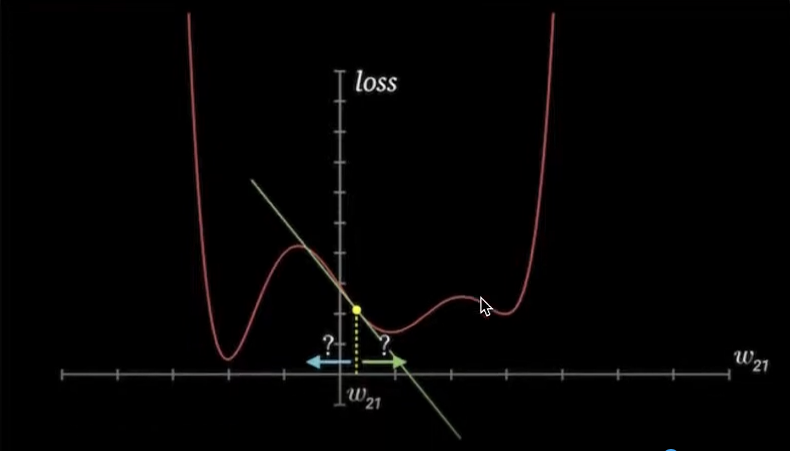

after computing gradient we have to clear the gradient by using zero function. we have to tell to pytorch make gradient zero.

In [ ]:
w.grad

tensor([[2551.8184, 1295.1218, 1289.5396],
        [2030.5638, 1878.8848, 1884.8765]])

In [ ]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# Gradient Descent optimization algorithm

there are five main steps in this model to reduce loss and improve our model:

1)  generate predictions

2)  calculate the loss

3)  compute gradient w.r.t weights and baises

4)  adjust weights by subtracting a small quatity proportional to the gradient

5)  reset the gradient to zero

lets implement all above steps as we have done earliar

In [ ]:
preds = model(inputs)
print(preds)

tensor([[ 85.1817,  68.2134],
        [119.7042,  77.8120],
        [ 21.5896,  82.3033],
        [ 49.8119, 125.0821],
        [132.1801, 128.6025]], grad_fn=<AddBackward0>)


In [ ]:
loss = mse(preds, targets)
print(loss)

tensor(2009.5325, grad_fn=<DivBackward0>)


In [ ]:
loss.backward()
print(w.grad)
print(b.grad)


tensor([[2551.8184, 1295.1218, 1289.5396],
        [2030.5638, 1878.8848, 1884.8765]])
tensor([16.8935, 19.4027])


let's update the weights by using above gradient

In [ ]:
w

tensor([[ 1.7320, -0.5469, -0.2529],
        [ 0.0232,  0.5140,  0.7146]], requires_grad=True)

In [ ]:
w.grad

tensor([[2551.8184, 1295.1218, 1289.5396],
        [2030.5638, 1878.8848, 1884.8765]])

as we can see the above w21 of "w" and "w.grad" has very huge difference so if we take simply diff of these two value then loss will be high because w is very low as compare to w.grad. so we have to make a logic, if we take any step then loss must decrese not increase.

In [ ]:
# now we have to mul w.grad with 1e-5 to make the value small
w.grad * 1e-5

tensor([[0.0255, 0.0130, 0.0129],
        [0.0203, 0.0188, 0.0188]])

In [ ]:
# adjust weights and reset gradients
with torch.no_grad():  # means we just use gradient not calculate gradient
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5
  w.grad.zero_()
  b.grad.zero_()

In [ ]:
print(w)
print(b)

tensor([[ 1.7065, -0.5599, -0.2658],
        [ 0.0029,  0.4952,  0.6957]], requires_grad=True)
tensor([-1.5067,  1.5771], requires_grad=True)


as we can see above the weights and baises has updated

In [ ]:
# calculate loss

preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(1818.9633, grad_fn=<DivBackward0>)


as we can se we have achieved a significant reduction in loss by marely adjusting weights and baises using gradient descent.

now we have to repeat these steps(adjusting weights and baises) multiple time to reduce the loss. we will train our model by using multiple epochs.

In [ ]:
# train for 100 epochs
for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()


In [ ]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(938.1764, grad_fn=<DivBackward0>)


now lets check predections and targets

In [ ]:
preds

tensor([[59.9730, 51.4763],
        [82.0377, 57.0359],
        [22.8218, 65.1638],
        [45.1912, 97.3916],
        [95.6660, 95.9501]], grad_fn=<AddBackward0>)

In [ ]:
targets

tensor([[ 34.,  77.],
        [ 78.,  45.],
        [ 78., 100.],
        [ 78.,  66.],
        [ 56.,  97.]])

# linear regression by pytorch built-in function 

In [ ]:
import torch.nn as nn 

In [ ]:
# temp, rainfall, humidity

inputs = np.array([[45, 33, 54],
                   [39, 54, 44],
                   [75, 99, 87],
                   [67, 45, 64],
                   [54, 43, 51],
                   [56, 54, 75],
                   [56, 55, 47],
                   [67, 78, 41],
                   [75, 77, 87],
                   [37, 56, 94],
                   [12, 43, 91],
                   [66, 88, 35],
                   [38, 48, 86],
                   [94, 78, 82]], dtype = 'float32')
                  

In [ ]:
#targets
#apple, orange

targets = np.array([[47, 54],
                   [31, 64],
                   [43, 86],
                   [77, 34],
                   [63, 91],
                   [74, 90],
                   [86, 12],
                   [59, 30],
                   [68, 77],
                   [27, 73],
                   [49, 83],
                   [69, 36],
                   [53, 82],
                   [24, 12]], dtype = 'float32')
                  


In [ ]:
#lets convert np array to tensor

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[45., 33., 54.],
        [39., 54., 44.],
        [75., 99., 87.],
        [67., 45., 64.],
        [54., 43., 51.],
        [56., 54., 75.],
        [56., 55., 47.],
        [67., 78., 41.],
        [75., 77., 87.],
        [37., 56., 94.],
        [12., 43., 91.],
        [66., 88., 35.],
        [38., 48., 86.],
        [94., 78., 82.]])
tensor([[47., 54.],
        [31., 64.],
        [43., 86.],
        [77., 34.],
        [63., 91.],
        [74., 90.],
        [86., 12.],
        [59., 30.],
        [68., 77.],
        [27., 73.],
        [49., 83.],
        [69., 36.],
        [53., 82.],
        [24., 12.]])


we have taken 15 traning example because sometime we face very large dataset which contains thousands of training example then we divide datas
et into small batches (in this situation we will create 5 batches then access). 

for this we will create tensordataset and dataloader as well.

# Dataset and dataloader

In [ ]:
from torch.utils.data import TensorDataset

tensordataset allows to rows from "inputs" and "targets" as touple, and provide APIs for working with many diff type of datasets in pytorch.

In [ ]:
#define dataset

train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[45., 33., 54.],
         [39., 54., 44.],
         [75., 99., 87.]]), tensor([[47., 54.],
         [31., 64.],
         [43., 86.]]))

we have access data from dataset as databatches and then these batches processed into dataloader. it will split data into batches like we have 15 element and it will make 5 batches of 3 element.

now we will pass this data into dataloader. we will make batches of the data and then process it.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
#shuffle means when dataloader make the batches then it will shuffle the data randomly.

In [ ]:
inputs

tensor([[45., 33., 54.],
        [39., 54., 44.],
        [75., 99., 87.],
        [67., 45., 64.],
        [54., 43., 51.],
        [56., 54., 75.],
        [56., 55., 47.],
        [67., 78., 41.],
        [75., 77., 87.],
        [37., 56., 94.],
        [12., 43., 91.],
        [66., 88., 35.],
        [38., 48., 86.],
        [94., 78., 82.]])

In [ ]:
for ib, ob in train_dl:
  print(ib)
  print(ob)
  break

tensor([[67., 78., 41.],
        [56., 55., 47.],
        [67., 45., 64.],
        [12., 43., 91.],
        [56., 54., 75.]])
tensor([[59., 30.],
        [86., 12.],
        [77., 34.],
        [49., 83.],
        [74., 90.]])


we make shuffle because it will take randomly batches which is very effective in loss reduction. alternatively if we pick batches 1st to last respectively then loss of first batch and loss of last batches will be very huge so that we will take shuffle.

# nn.linear

instead of manually initilize weights and baises we will define model using nn.linear. it will automatically load weights and baises, we just have to give number of inputs and num of targets(outputs).

In [ ]:
#define model
model = nn.Linear(3, 2) #3 is inputs(temp, rainfall and humidity and 2 is outputs yield of apple and orange)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.0262,  0.2734,  0.1369],
        [ 0.1206,  0.4331, -0.4888]], requires_grad=True)
Parameter containing:
tensor([-0.1238,  0.3544], requires_grad=True)


if we want to see how many matrics in medel then we will call parameter function

In [ ]:
#define parameter
list(model.parameters())

[Parameter containing:
 tensor([[-0.0262,  0.2734,  0.1369],
         [ 0.1206,  0.4331, -0.4888]], requires_grad=True),
 Parameter containing:
 tensor([-0.1238,  0.3544], requires_grad=True)]

In [ ]:
#now generate prediction
preds = model(inputs)
print(preds)

tensor([[ 15.1105,  -6.3188],
        [ 19.6411,   6.9404],
        [ 36.8869,   9.7554],
        [ 19.1835,  -3.3555],
        [ 17.1982,   0.5643],
        [ 23.4383,  -6.1611],
        [ 19.8795,   7.9580],
        [ 25.0587,  22.1791],
        [ 30.8714,   0.2270],
        [ 27.0837, -16.8738],
        [ 23.7739, -24.0536],
        [ 26.9981,  29.3222],
        [ 23.7751, -16.3077],
        [ 29.9625,   5.3961]], grad_fn=<AddmmBackward>)


In [ ]:
targets

tensor([[47., 54.],
        [31., 64.],
        [43., 86.],
        [77., 34.],
        [63., 91.],
        [74., 90.],
        [86., 12.],
        [59., 30.],
        [68., 77.],
        [27., 73.],
        [49., 83.],
        [69., 36.],
        [53., 82.],
        [24., 12.]])

## loss

in earliar we have define mse function to compute loss but distime will compute this by torch builtin function "torch.nn.functional".

In [ ]:
import torch.nn.functional as F

In [ ]:
loss_fn = F.mse_loss #mse_loss is implemented built_in


In [ ]:
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(3077.2637, grad_fn=<MseLossBackward>)


## Optimizer

instead of manually manipulating the weights and baises using gradient, we use "optim.sgd" optim is optimzer and SGD is stochastic gradient discent. we picked data as random batches so that we called stochastic.

In [ ]:
#optimzer

opt = torch.optim.SGD(model.parameters(), lr=1e-5)

#lr is learnig rate which will multiply by gradient. if don't do this it may take very huge steps so that we will mul it by gradient

## model training

follow the five steps that have done earliar 

*   generate prediction

*   calculate loss

*   compute gradient w.r.t weights and baises

*   adjust weights by subtracting small quantity proportional to gradient

*   reset gradient to zero


In [ ]:
# model training

def fit(num_epochs, model, loss_fn, opt, train_dl):

  #repeat for given number of epochs
  for epochs in range(num_epochs):

    #train with batch of data
    for ib, ob in train_dl:

      # 1. generate prediction
      pred = model(ib)

      # 2. calculate loss
      loss = loss_fn(pred, ob)

      # 3. compute gradient
      loss.backward()

      # 4. update parameter using gradient
      opt.step()

      # 5. reset gradient to zero
      opt.zero_grad()

    # print the epochs
    if (epochs+1) % 10 == 0:
      print('epochs [{}/{}], loss: {:.4f}'.format(epochs+1, num_epochs, loss.item()))


In [ ]:
fit(100, model, loss_fn, opt, train_dl)

epochs [10/100], loss: 1002.2258
epochs [20/100], loss: 256.2097
epochs [30/100], loss: 281.4892
epochs [40/100], loss: 209.6024
epochs [50/100], loss: 583.7407
epochs [60/100], loss: 777.8755
epochs [70/100], loss: 280.3633
epochs [80/100], loss: 380.8050
epochs [90/100], loss: 182.0675
epochs [100/100], loss: 523.2087


In [ ]:
pred = model(inputs)
print(pred)

tensor([[40.6553, 39.6284],
        [36.1541, 41.9661],
        [69.8077, 80.5300],
        [56.0738, 42.2354],
        [45.4811, 36.2766],
        [53.4092, 61.4404],
        [46.3312, 36.3930],
        [52.3264, 34.4643],
        [68.3947, 71.7765],
        [47.9368, 89.2230],
        [32.5900, 94.1142],
        [50.8884, 33.5022],
        [45.9322, 78.2582],
        [77.6310, 57.9102]], grad_fn=<AddmmBackward>)


In [ ]:
targets

tensor([[47., 54.],
        [31., 64.],
        [43., 86.],
        [77., 34.],
        [63., 91.],
        [74., 90.],
        [86., 12.],
        [59., 30.],
        [68., 77.],
        [27., 73.],
        [49., 83.],
        [69., 36.],
        [53., 82.],
        [24., 12.]])

now let supose we have another dataset and we will pass that dataset to our model then it will calculate automatically yield of apple and oranges.

let we give iputs of temp, rainfall, and humidity 

In [ ]:
model(torch.tensor([[44,78,21.]])) 

tensor([[34.5780, 28.0559]], grad_fn=<AddmmBackward>)